In [1]:
import pandas as pd
import numpy as np
import torch
from torch.utils.data import Dataset, DataLoader
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Load the fused dataset
df = pd.read_parquet('cic-collection.parquet')

# Display basic information about the dataset
print(f"Dataset shape: {df.shape}")
print(f"Attack classes: {df['ClassLabel'].unique()}")
print(f"Dataset class distribution:\n{df['ClassLabel'].value_counts()}")

Dataset shape: (9167581, 59)
Attack classes: ['Benign' 'Botnet' 'Bruteforce' 'DoS' 'DDoS' 'Infiltration' 'Portscan'
 'Webattack']
Dataset class distribution:
ClassLabel
Benign          7186189
DDoS            1234729
DoS              397344
Botnet           145968
Bruteforce       103244
Infiltration      94857
Webattack          2995
Portscan           2255
Name: count, dtype: int64


In [ ]:
df.head()

,Flow Duration,Total Fwd Packets,Total Backward Packets,Fwd Packets Length Total,Bwd Packets Length Total,Fwd Packet Length Max,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,Bwd Packet Length Mean,...,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label,ClassLabel
0,4,2,0,12.0,0.0,6.0,6.00000,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign,Benign
1,1,2,0,12.0,0.0,6.0,6.00000,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign,Benign
2,3,2,0,12.0,0.0,6.0,6.00000,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign,Benign
3,1,2,0,12.0,0.0,6.0,6.00000,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign,Benign
4,609,7,4,484.0,414.0,233.0,69.14286,111.967896,207.0,103.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign,Benign


In [6]:
df.shape

(9167581, 59)

In [10]:
print(df.sample(n=5, random_state=42))

         Flow Duration  Total Fwd Packets  Total Backward Packets  \
4172603           1117                  5                       2   
2403103       71066989                 39                      73   
6144422        4398539                  5                       3   
4594999           1002                  4                       0   
7798266            479                  1                       1   

         Fwd Packets Length Total  Bwd Packets Length Total  \
4172603                     935.0                     349.0   
2403103                     264.0                   96392.0   
6144422                     935.0                     320.0   
4594999                       0.0                       0.0   
7798266                      47.0                      79.0   

         Fwd Packet Length Max  Fwd Packet Length Mean  Fwd Packet Length Std  \
4172603                  935.0              187.000000             418.144714   
2403103                  155.0              

In [11]:
y = df['ClassLabel']

In [12]:
print(y.unique())

['Benign' 'Botnet' 'Bruteforce' 'DoS' 'DDoS' 'Infiltration' 'Portscan'
 'Webattack']


C:\Users\Soham\AppData\Local\Temp\ipykernel_15880\1428008305.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='ClassLabel', data=df, palette='viridis')


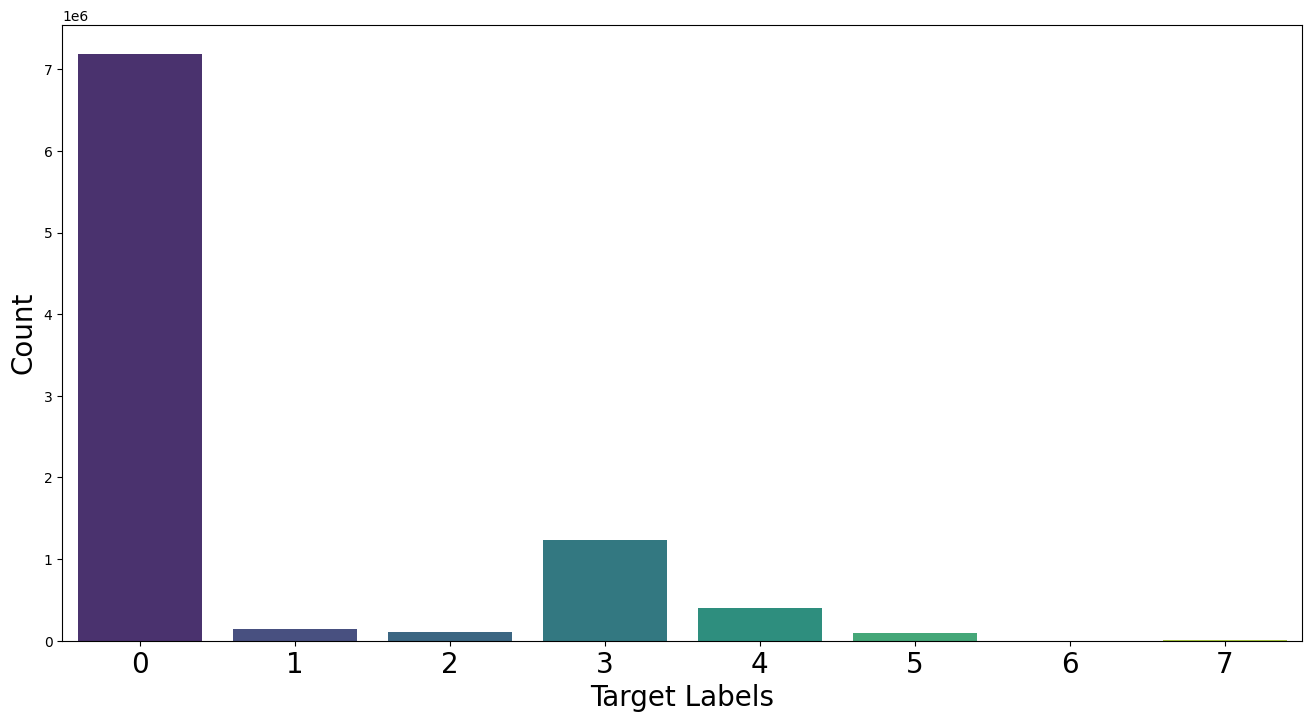

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a larger and clearer figure
plt.figure(figsize=(16, 8))

# Distribution of the target variable
sns.countplot(x='ClassLabel', data=df, palette='viridis')

# Set title and labels
#plt.title('Distribution of the Target Labels', fontsize=16)
plt.xlabel('Target Labels', fontsize=20)
plt.ylabel('Count', fontsize=20)

# Increase the font size of x-axis tick labels
plt.xticks(fontsize=20)  # Adjust the font size according to your preference

plt.savefig('Distribution_target_variables.jpg')
# Show the plot
plt.show()


In [19]:
feature_info = pd.DataFrame({
    'Feature Name': df.columns,
    'Data Type': df.dtypes
})

# Map data types to categories (e.g., text, number)
feature_info['Type Category'] = feature_info['Data Type'].apply(lambda x: 'Text' if x == 'object' else 'Number')

# Add your additional column to the table

# Display the resulting table
print(feature_info)

# Save to a CSV file
feature_info.to_csv('feature_info.csv', index=False)


# Note: Choose either saving to a file or copying to the clipboard based on your preference.


                                      Feature Name Data Type Type Category
Flow Duration                        Flow Duration     int64        Number
Total Fwd Packets                Total Fwd Packets     int32        Number
Total Backward Packets      Total Backward Packets     int32        Number
Fwd Packets Length Total  Fwd Packets Length Total   float64        Number
Bwd Packets Length Total  Bwd Packets Length Total   float64        Number
Fwd Packet Length Max        Fwd Packet Length Max   float64        Number
Fwd Packet Length Mean      Fwd Packet Length Mean   float32        Number
Fwd Packet Length Std        Fwd Packet Length Std   float32        Number
Bwd Packet Length Max        Bwd Packet Length Max   float64        Number
Bwd Packet Length Mean      Bwd Packet Length Mean   float32        Number
Bwd Packet Length Std        Bwd Packet Length Std   float32        Number
Flow Bytes/s                          Flow Bytes/s   float64        Number
Flow Packets/s           

In [20]:
# List of labels and their corresponding counts
labels_and_counts = {
    'Benign': 7186189,
    'DDoS': 1234729,
    'DoS': 397344,
    'Botnet': 145968,
    'Bruteforce': 103244,
    'Infiltration': 94857,
    'Webattack': 2995,
    'Portscan': 2255
}

# Check if rows with each label are unique
for label, count in labels_and_counts.items():
    rows_with_label = df[df['ClassLabel'] == label]

    if not rows_with_label.duplicated().any():
        print(f"All {count} rows with label '{label}' are unique.")
    else:
        print(f"There are duplicates in {count} rows with label '{label}'.")
        print(rows_with_label[rows_with_label.duplicated()])
    print("="*50)

All 7186189 rows with label 'Benign' are unique.
All 1234729 rows with label 'DDoS' are unique.
All 397344 rows with label 'DoS' are unique.
All 145968 rows with label 'Botnet' are unique.
All 103244 rows with label 'Bruteforce' are unique.
All 94857 rows with label 'Infiltration' are unique.
All 2995 rows with label 'Webattack' are unique.
All 2255 rows with label 'Portscan' are unique.


In [21]:
df.drop_duplicates(subset=df.columns[:-1], keep='first')
df.shape

(9167581, 58)

In [2]:
# List of labels to keep
labels_to_keep = ['Benign', 'DoS','DDoS', 'Bruteforce', 'Botnet']

# Filter the DataFrame to only keep rows with specified labels
df = df[df['ClassLabel'].isin(labels_to_keep)]


In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

In [4]:
df = df.drop(columns='Label')

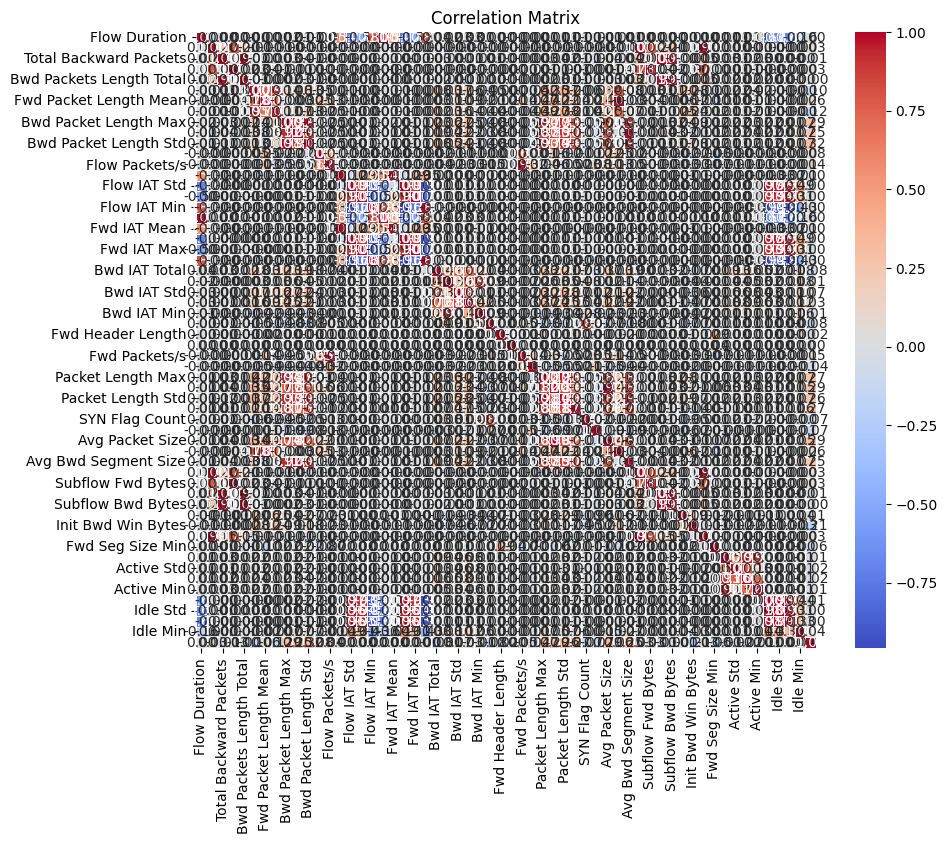

In [5]:
# Encode the 'ClassLabel' column to numerical values for correlation
df['ClassLabel'] = df['ClassLabel'].astype('category').cat.codes

label_encoder = LabelEncoder()
df['ClassLabel'] = label_encoder.fit_transform(df['ClassLabel'])

# Calculate the correlation matrix
correlation_matrix = df.corr()

# Plot the heatmap using Seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix')
plt.show()

In [7]:
correlation_matrix['ClassLabel'].drop('ClassLabel').sort_values(ascending=False)

Bwd Packet Length Std       0.318631
Avg Packet Size             0.292577
Bwd Packet Length Max       0.288483
Packet Length Mean          0.285536
Packet Length Variance      0.270079
Packet Length Max           0.269293
Packet Length Std           0.258523
Bwd Packet Length Mean      0.247512
Avg Bwd Segment Size        0.247512
Flow Bytes/s                0.077395
Bwd IAT Std                 0.066641
Fwd Packet Length Mean      0.057875
Avg Fwd Segment Size        0.057875
Fwd Packets/s               0.046740
Idle Min                    0.039265
Flow Packets/s              0.037767
Bwd IAT Max                 0.032245
Subflow Fwd Bytes           0.030384
Fwd Packets Length Total    0.030384
Fwd Act Data Packets        0.029718
Subflow Fwd Packets         0.029071
Total Fwd Packets           0.029071
Init Fwd Win Bytes          0.011943
Idle Mean                   0.009374
Bwd IAT Mean                0.009140
Idle Max                    0.003860
Fwd IAT Max                 0.003096
F

In [8]:
positive_correlation_features = [
    'Avg Packet Size', 'Packet Length Mean', 'Bwd Packet Length Std', 'Packet Length Variance',
    'Bwd Packet Length Max', 'Packet Length Max', 'Packet Length Std', 'Fwd Packet Length Mean',
    'Avg Fwd Segment Size', 'Flow Bytes/s', 'Avg Bwd Segment Size', 'Bwd Packet Length Mean',
    'Fwd Packets/s', 'Flow Packets/s', 'Init Fwd Win Bytes', 'Subflow Fwd Bytes',
    'Fwd Packets Length Total', 'Fwd Act Data Packets', 'Total Fwd Packets', 'Subflow Fwd Packets'
    # Add more features as needed
]
df = df[positive_correlation_features + ['ClassLabel']]

In [9]:
# Get the counts of each label
label_counts = df['ClassLabel'].value_counts()

# Set the target count to the count of label 2
target_count = label_counts.min()

# Undersample labels 0 and 1 to the target count
undersampled_df = pd.concat([
    df[df['ClassLabel'] == 0].sample(target_count, replace=False),
    df[df['ClassLabel'] == 1].sample(target_count, replace=False),
    df[df['ClassLabel'] == 2],
    df[df['ClassLabel'] == 3].sample(target_count, replace=False)
], axis=0)

# Shuffle the undersampled DataFrame to mix the labels
undersampled_df = undersampled_df.sample(frac=1).reset_index(drop=True)


In [10]:
undersampled_df.shape

(412976, 21)

In [11]:
df = undersampled_df

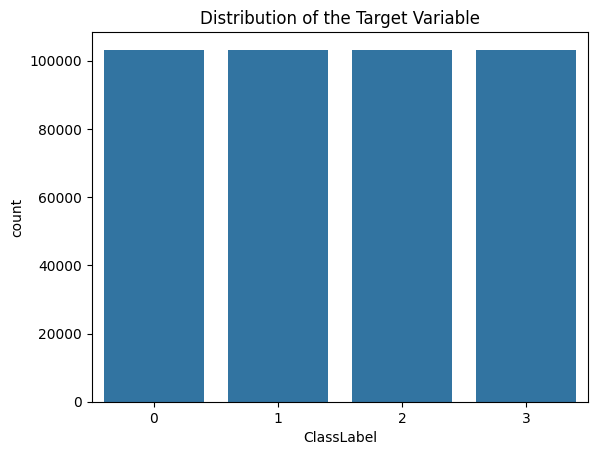

In [12]:
# Distribution of the target variable
sns.countplot(x='ClassLabel', data=df)
plt.title('Distribution of the Target Variable')
plt.show()

In [13]:
print(df['ClassLabel'])

0         3
1         1
2         3
3         1
4         2
         ..
412971    3
412972    2
412973    0
412974    2
412975    3
Name: ClassLabel, Length: 412976, dtype: int64
